# Bag Analysis Task

### Import

In [1]:
import bagpy
from bagpy import bagreader
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Read ROS BAG file using bagpy

In [2]:
PATH = '/home/nayan/NODE_Robotics/environment_files'

# bag1: bag file from 01.10.2020 between 11:20-11:30 
# bag2: random bag file for reference
bag1_name = 'dummy_env-agv-50231.agv-2020-10-01T082312+0200_2020-10-01-11-28-17_37.bag'
bag2_name = 'dummy_env-02LSTRV30209OA001.agv-2020-09-17T101249+0200_2020-09-18-15-07-52_347.bag'

b1 = bagreader(PATH + '/' + bag1_name)
b2 = bagreader(PATH + '/' + bag2_name)

[INFO]  Data folder /home/nayan/NODE_Robotics/environment_files/dummy_env-agv-50231.agv-2020-10-01T082312+0200_2020-10-01-11-28-17_37 already exists. Not creating.
[INFO]  Data folder /home/nayan/NODE_Robotics/environment_files/dummy_env-02LSTRV30209OA001.agv-2020-09-17T101249+0200_2020-09-18-15-07-52_347 already exists. Not creating.


-----

## For bag1

### Inspect Topics

In [3]:
b1.topic_table

,Topics,Types,Message Count,Frequency
0,/BMS/SOC,std_msgs/Float64,3000,9.924763
1,/BMS/U,std_msgs/Float64,3000,9.924786
2,/bmw_control/left/motor_state_throttled,knx_motor_control/WittensteinMotorState,2888,9.920608
3,/bmw_control/right/motor_state_throttled,knx_motor_control/WittensteinMotorState,2888,9.921171
4,/clock,rosgraph_msgs/Clock,6065,19.861604
...,...,...,...,...
67,/stop_signal_soft,std_msgs/Bool,2,0.022214
68,/stop_signal_soft_teleop_override,std_msgs/Bool,3,0.023870
69,/tf,tf2_msgs/TFMessage,59442,NaN
70,/tf_static,tf2_msgs/TFMessage,1,NaN


### Inspect Topic: /cmd_vel to check when robot stops

In [4]:
cmd_vel_msg = b1.message_by_topic('/cmd_vel')
df_cmd_vel_msg = pd.read_csv(cmd_vel_msg)
df_cmd_vel_msg

,Time,linear.x,linear.y,linear.z,angular.x,angular.y,angular.z
0,1.601544e+09,0.419721,0.0,0.0,0.0,0.0,0.141330
1,1.601544e+09,0.427854,0.0,0.0,0.0,0.0,0.112794
2,1.601544e+09,0.427854,0.0,0.0,0.0,0.0,0.112794
3,1.601544e+09,0.429113,0.0,0.0,0.0,0.0,0.108376
4,1.601544e+09,0.430095,0.0,0.0,0.0,0.0,0.104930
...,...,...,...,...,...,...,...
8995,1.601545e+09,0.000000,0.0,0.0,0.0,0.0,0.000000
8996,1.601545e+09,0.000000,0.0,0.0,0.0,0.0,0.000000
8997,1.601545e+09,0.000000,0.0,0.0,0.0,0.0,0.000000
8998,1.601545e+09,0.000000,0.0,0.0,0.0,0.0,0.000000


### Plotting time vs linear velocity in x graph

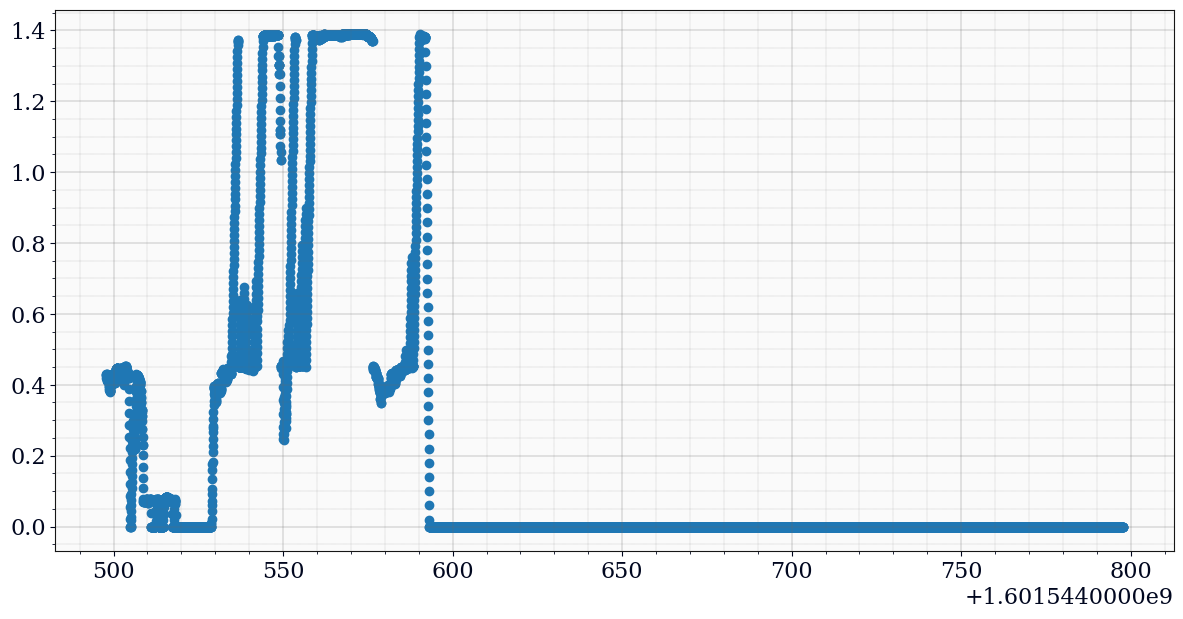

In [5]:
fig, ax = bagpy.create_fig(1)
ax[0].scatter(x='Time', y='linear.x', data=df_cmd_vel_msg)
plt.show()

### Plotting time vs angular velocity in z graph

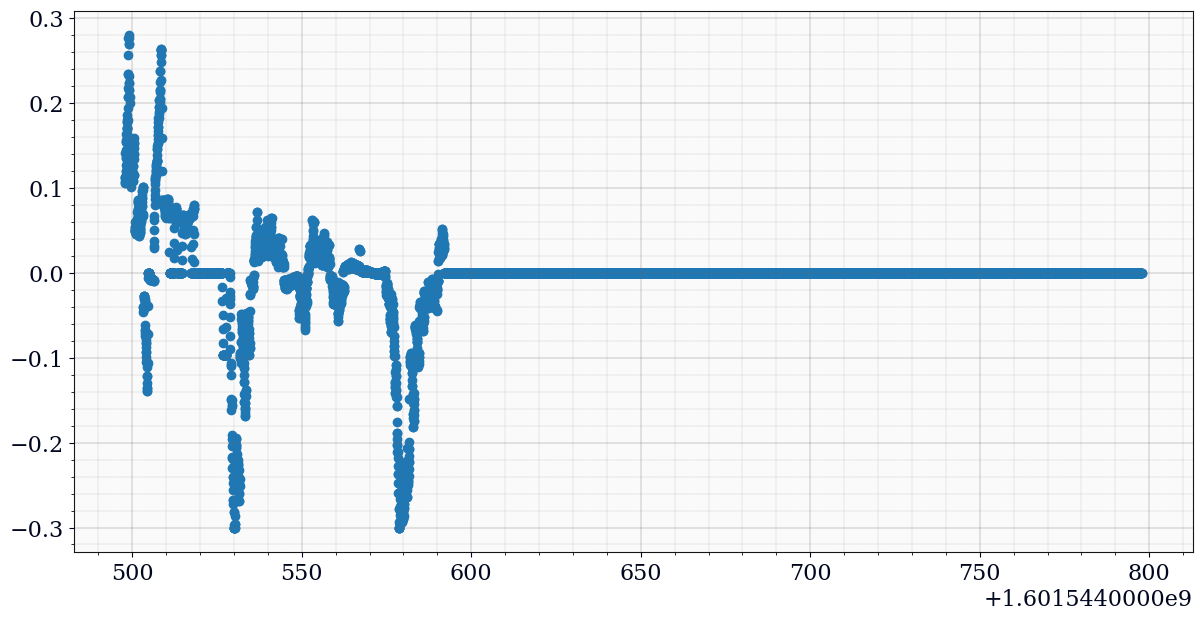

In [6]:
fig, ax = bagpy.create_fig(1)
ax[0].scatter(x='Time', y='angular.z', data=df_cmd_vel_msg)
plt.show()

------

## For bag2

### Inspect Topics

In [7]:
b2.topic_table

,Topics,Types,Message Count,Frequency
0,/BMS/SOC,std_msgs/Float64,2456,9.997650
1,/BMS/U,std_msgs/Float64,2456,9.997507
2,/bmwstr_zone_model/event_feedback,std_msgs/String,5,0.025556
3,/bmwstr_zone_model/trigger_events,std_msgs/String,14,0.059536
4,/bmwstr_zone_model/zone_manager_node/entry_zon...,std_msgs/String,5,0.026319
5,/bmwstr_zone_model/zone_manager_node/exit_zone...,std_msgs/String,6,0.027398
6,/cmd_vel,geometry_msgs/Twist,9000,29.995523
7,/cmd_vel_safety,geometry_msgs/Twist,4990,19.908883
8,/cmd_vel_safety_limited,geometry_msgs/Twist,4990,19.912380
9,/cmd_vel_safety_planned,geometry_msgs/Twist,4990,19.923352


### Inspect Topic: /cmd_vel to check when robot stops

In [8]:
cmd_vel_msg = b2.message_by_topic('/cmd_vel')
df_cmd_vel_msg = pd.read_csv(cmd_vel_msg)
df_cmd_vel_msg

,Time,linear.x,linear.y,linear.z,angular.x,angular.y,angular.z
0,1.600434e+09,0.167555,0.0,0.0,0.0,0.0,0.002086
1,1.600434e+09,0.167555,0.0,0.0,0.0,0.0,-0.000178
2,1.600434e+09,0.168142,0.0,0.0,0.0,0.0,0.001865
3,1.600434e+09,0.168142,0.0,0.0,0.0,0.0,-0.000404
4,1.600434e+09,0.168742,0.0,0.0,0.0,0.0,-0.000700
...,...,...,...,...,...,...,...
8995,1.600435e+09,0.142556,0.0,0.0,0.0,0.0,0.002491
8996,1.600435e+09,0.138511,0.0,0.0,0.0,0.0,0.002592
8997,1.600435e+09,0.138511,0.0,0.0,0.0,0.0,0.002592
8998,1.600435e+09,0.135267,0.0,0.0,0.0,0.0,0.003803


### Plotting time vs linear velocity in x graph

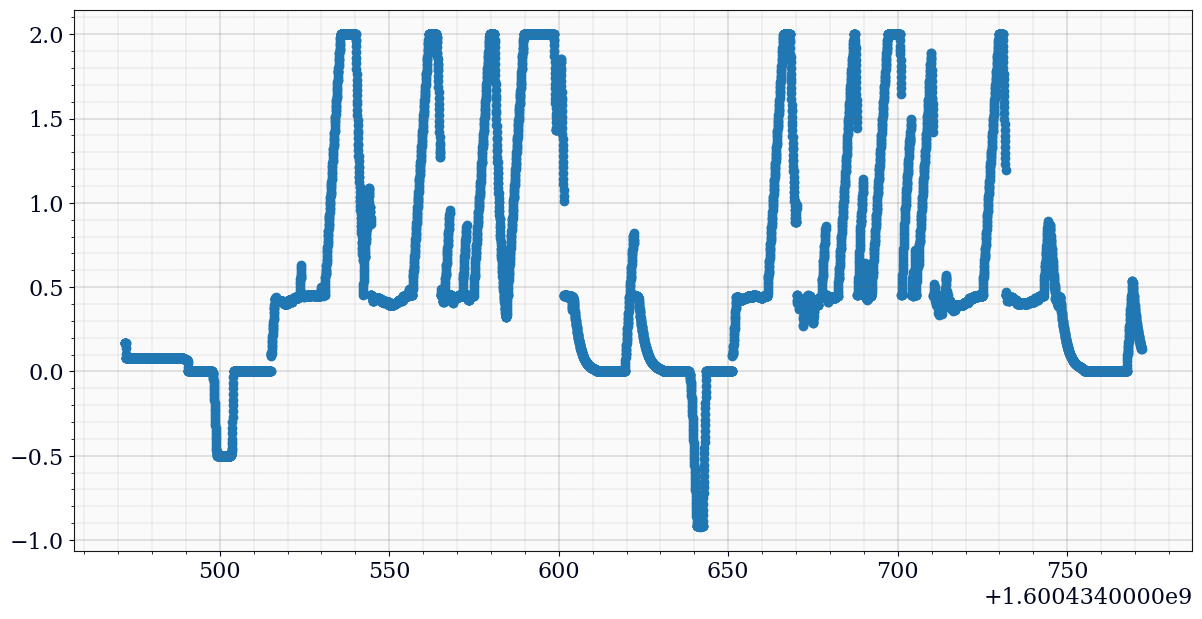

In [9]:
fig, ax = bagpy.create_fig(1)
ax[0].scatter(x='Time', y='linear.x', data=df_cmd_vel_msg)
plt.show()

### Plotting time vs angular velocity in z graph

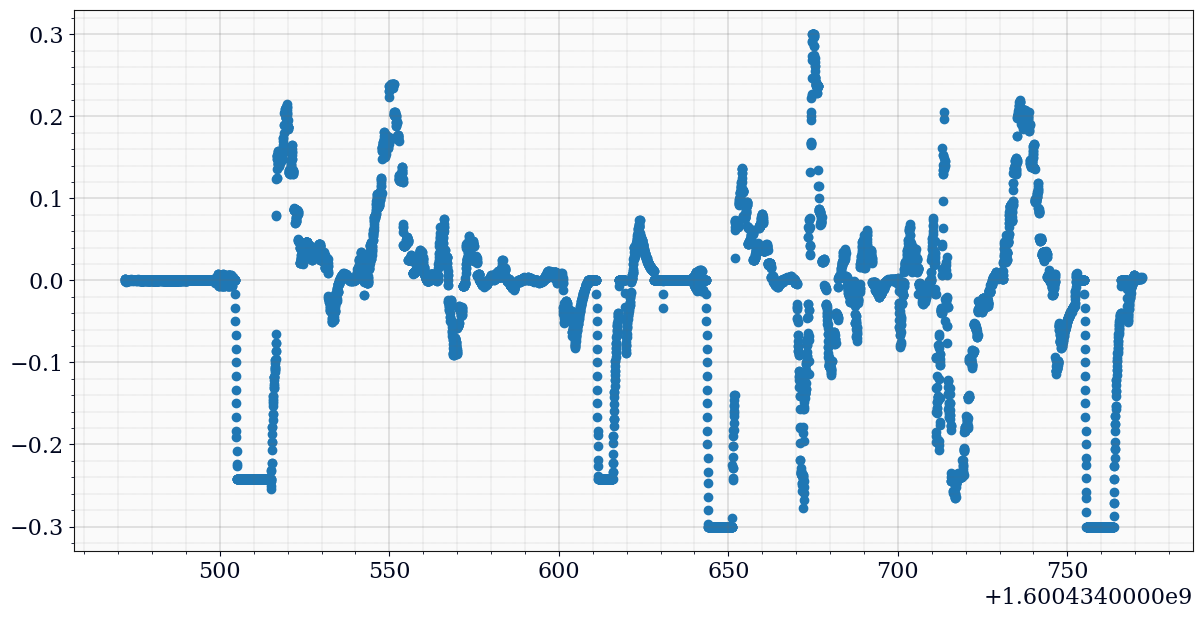

In [10]:
fig, ax = bagpy.create_fig(1)
ax[0].scatter(x='Time', y='angular.z', data=df_cmd_vel_msg)
plt.show()

----

# Analysis

Two bag files are analysed. Bag 1 is the bag file from 01.10.2020 between 11:20-11:30. Bag 2 is a random bag file. We observe the linear velocity in the x-axis and angular velocity in the z-axis of the robot using the '/cmd_vel' topic. 

We notice that there is a sudden cut-off in the linear velocity in x-axis and angular velocity in z-axis in Bag 1. This indicates that the robot stopped moving. This indicates that something might be wrong in the robot. The linear velocity in x-axis and angular velocity in z-axis do not suddenly cut-off. 